In [1]:
#Goal : create word vector from Game of Throne dataset
from __future__ import absolute_import, division, print_function # for dependency python 2 to 3
# For word encoding
import codecs
# Regex
import glob
# Concurrency
import multiprocessing
# Dealing with operating system like reading files
import os
# Pretty Printing
import pprint
# Regular Expression
import re
# Natural Language  Toolkit
import nltk
from nltk.corpus import stopwords
# WOrd 2 vec
from gensim.models import Word2Vec
# Dimensional Reductionality
import sklearn.manifold
#math
import numpy as np
#plotting
import matplotlib.pyplot as plt
#data processing 
import pandas as pd
# Data Visualization
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
book_filenames = sorted(glob.glob("../input/*.txt"))

In [3]:
print("Books Found :")
book_filenames

Books Found :


['../input/Harry Potter 1 - Sorcerers Stone.txt',
 '../input/Harry Potter 2 - Chamber of Secrets.txt',
 '../input/Harry Potter 3 - The Prisoner Of Azkaban.txt',
 '../input/Harry Potter 4 - The Goblet Of Fire.txt',
 '../input/Harry Potter 5 - Order of the Phoenix.txt',
 '../input/Harry Potter 6 - The Half Blood Prince.txt',
 '../input/Harry Potter 7 - Deathly Hollows.txt']

In [4]:
corpus_raw = ""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with open(book_filename, "rb") as infile:
        corpus_raw += str(infile.read())
        
        print("Corpus is now {0} characters long". format(len(corpus_raw)))
        print()
        

Reading '../input/Harry Potter 1 - Sorcerers Stone.txt'...
Corpus is now 464121 characters long

Reading '../input/Harry Potter 2 - Chamber of Secrets.txt'...
Corpus is now 984318 characters long

Reading '../input/Harry Potter 3 - The Prisoner Of Azkaban.txt'...
Corpus is now 1637416 characters long

Reading '../input/Harry Potter 4 - The Goblet Of Fire.txt'...
Corpus is now 2798934 characters long

Reading '../input/Harry Potter 5 - Order of the Phoenix.txt'...
Corpus is now 4362700 characters long

Reading '../input/Harry Potter 6 - The Half Blood Prince.txt'...
Corpus is now 5372785 characters long

Reading '../input/Harry Potter 7 - Deathly Hollows.txt'...
Corpus is now 6537883 characters long



In [5]:
text = corpus_raw

# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = text.strip()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [6]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)

In [7]:
sentences

["b'harry potter and the sorcerer\\'s stone \\r\\n\\r\\nchapter one \\r\\n\\r\\nthe boy who lived \\r\\n\\r\\nmr.",
 'and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much.',
 "they were the last people you\\'d expect to be involved in anything strange or mysterious, because they just didn\\'t hold with such nonsense.",
 '\\r\\n\\r\\nmr.',
 'dursley was the director of a firm called grunnings, which made drills.',
 'he was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere.',
 '\\r\\n\\r\\nthe dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody w

In [8]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

In [9]:
sentences

[["b'harry",
  'potter',
  'and',
  'the',
  'sorcerer\\',
  "'s",
  'stone',
  '\\r\\n\\r\\nchapter',
  'one',
  '\\r\\n\\r\\nthe',
  'boy',
  'who',
  'lived',
  '\\r\\n\\r\\nmr',
  '.'],
 ['and',
  'mrs.',
  'dursley',
  ',',
  'of',
  'number',
  'four',
  ',',
  'privet',
  'drive',
  ',',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  ',',
  'thank',
  'you',
  'very',
  'much',
  '.'],
 ['they',
  'were',
  'the',
  'last',
  'people',
  'you\\',
  "'d",
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  ',',
  'because',
  'they',
  'just',
  "didn\\'t",
  'hold',
  'with',
  'such',
  'nonsense',
  '.'],
 ['\\r\\n\\r\\nmr', '.'],
 ['dursley',
  'was',
  'the',
  'director',
  'of',
  'a',
  'firm',
  'called',
  'grunnings',
  ',',
  'which',
  'made',
  'drills',
  '.'],
 ['he',
  'was',
  'a',
  'big',
  ',',
  'beefy',
  'man',
  'with',
  'hardly',
  'any',
  'neck',
  ','

In [10]:
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [11]:
sentences

[["b'harry",
  'potter',
  'sorcerer\\',
  "'s",
  'stone',
  '\\r\\n\\r\\nchapter',
  'one',
  '\\r\\n\\r\\nthe',
  'boy',
  'lived',
  '\\r\\n\\r\\nmr',
  '.'],
 ['mrs.',
  'dursley',
  ',',
  'number',
  'four',
  ',',
  'privet',
  'drive',
  ',',
  'proud',
  'say',
  'perfectly',
  'normal',
  ',',
  'thank',
  'much',
  '.'],
 ['last',
  'people',
  'you\\',
  "'d",
  'expect',
  'involved',
  'anything',
  'strange',
  'mysterious',
  ',',
  "didn\\'t",
  'hold',
  'nonsense',
  '.'],
 ['\\r\\n\\r\\nmr', '.'],
 ['dursley',
  'director',
  'firm',
  'called',
  'grunnings',
  ',',
  'made',
  'drills',
  '.'],
 ['big',
  ',',
  'beefy',
  'man',
  'hardly',
  'neck',
  ',',
  'although',
  'large',
  'mustache',
  '.'],
 ['mrs.',
  'dursley',
  'thin',
  'blonde',
  'nearly',
  'twice',
  'usual',
  'amount',
  'neck',
  ',',
  'came',
  'useful',
  'spent',
  'much',
  'time',
  'craning',
  'garden',
  'fences',
  ',',
  'spying',
  'neighbors',
  '.'],
 ['dursleys',
  'small'

In [12]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)

In [13]:
model

In [14]:
words = model.wv.vocab

In [15]:
words

{"b'harry": <gensim.models.keyedvectors.Vocab at 0x7f5d227a37f0>,
 'potter': <gensim.models.keyedvectors.Vocab at 0x7f5d227a3780>,
 'sorcerer\\': <gensim.models.keyedvectors.Vocab at 0x7f5d227a3b38>,
 "'s": <gensim.models.keyedvectors.Vocab at 0x7f5d227a3748>,
 'stone': <gensim.models.keyedvectors.Vocab at 0x7f5d227a30b8>,
 '\\r\\n\\r\\nchapter': <gensim.models.keyedvectors.Vocab at 0x7f5d227ace80>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7f5d227accf8>,
 '\\r\\n\\r\\nthe': <gensim.models.keyedvectors.Vocab at 0x7f5d227acbe0>,
 'boy': <gensim.models.keyedvectors.Vocab at 0x7f5d227acf98>,
 'lived': <gensim.models.keyedvectors.Vocab at 0x7f5d227acd30>,
 '\\r\\n\\r\\nmr': <gensim.models.keyedvectors.Vocab at 0x7f5d227ace10>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7f5d227ace48>,
 'mrs.': <gensim.models.keyedvectors.Vocab at 0x7f5d227acba8>,
 'dursley': <gensim.models.keyedvectors.Vocab at 0x7f5d227acdd8>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7f5d227acc18>,
 'number': <g

In [16]:
# Finding Word Vectors
vector = model.wv['harry']

In [17]:
vector

array([ 9.34118271e-01,  1.33264506e+00, -3.66678238e-01, -9.09368217e-01,
        1.25434482e+00,  7.95803428e-01, -1.29317686e-01, -3.52028519e-01,
        6.40357137e-01,  1.23056605e-01, -1.18346381e+00, -3.56238425e-01,
        6.46742463e-01, -1.62238955e+00, -4.01946217e-01,  5.58374941e-01,
        3.23297918e-01, -9.99222279e-01, -5.09527624e-01,  1.22005653e+00,
       -1.90435633e-01,  1.95807368e-01, -1.31723456e-04, -1.92504600e-02,
       -2.52788901e-01, -2.20936865e-01, -1.13899374e+00, -1.85113281e-01,
       -1.48093164e+00,  3.79796624e-01,  4.53950018e-02, -1.46573794e+00,
       -2.04066420e+00, -7.39377499e-01, -1.31165457e+00,  1.28556073e+00,
       -6.99476600e-01,  2.92853653e-01, -5.78015447e-01,  1.09389454e-01,
       -7.90097237e-01,  5.77472031e-01, -1.64515793e+00, -3.74319404e-01,
        3.35284285e-02, -1.82547122e-01,  6.12955987e-01, -3.57747152e-02,
       -7.34025717e-01,  1.51366889e+00,  2.85277784e-01,  1.16452098e+00,
       -1.42780870e-01, -

In [18]:
# Most similar words
similar = model.wv.most_similar('mcgonagall')

In [19]:
similar

[('trelawney', 0.9707015156745911),
 ('grubbly\\xadplank', 0.9700542092323303),
 ('flitwick', 0.9640324115753174),
 ('sinistra\\x', 0.9608971476554871),
 ('sprout', 0.9585058093070984),
 ('flitwick.\\r\\n', 0.9529460072517395),
 ('umbridge', 0.9518550038337708),
 ('umbridge.\\r\\n', 0.9440946578979492),
 ('binns', 0.9216122627258301),
 ('trelawney.\\r\\n\\r\\n', 0.9203663468360901)]

In [20]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0] 
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [21]:
nearest_similarity_cosmul("harry", "professor", "snape")
nearest_similarity_cosmul("dumbledore", "elder", "wand")
nearest_similarity_cosmul("lupin", "james", "sirius")

harry is related to professor, as whispered.\r\neven is related to snape
dumbledore is related to elder, as honestly.. is related to wand
lupin is related to james, as harry.\r\nhe is related to sirius


'harry.\\r\\nhe'

In [22]:
X = model[model.wv.vocab]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [23]:
X

array([[ 6.8242438e-03, -7.8095361e-03,  8.8635655e-03, ...,
        -1.8764107e-02, -4.4717365e-03,  3.7376527e-03],
       [-2.0291135e+00, -3.1161302e-01, -7.4032223e-01, ...,
        -1.1412157e+00, -4.2868298e-01, -6.3578814e-01],
       [-8.4994912e-02, -1.0492960e-02,  5.2263326e-04, ...,
        -2.2103842e-01, -1.6011706e-01,  1.3160676e-01],
       ...,
       [-1.1536938e-02,  1.5070885e-02, -1.5651267e-02, ...,
        -3.9689807e-04,  1.7731708e-03, -1.4989012e-02],
       [-2.7824080e-04,  1.2285553e-03,  9.8789614e-03, ...,
        -7.5096088e-03,  1.0743436e-02,  2.4852012e-03],
       [ 1.4960431e-03,  1.7146276e-02,  8.1583103e-03, ...,
        -6.4534950e-03,  4.9599530e-03, -1.1456454e-02]], dtype=float32)

**Plot Word Vectors Using PCA**

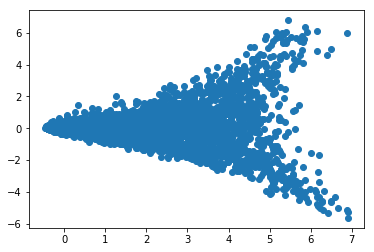

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])

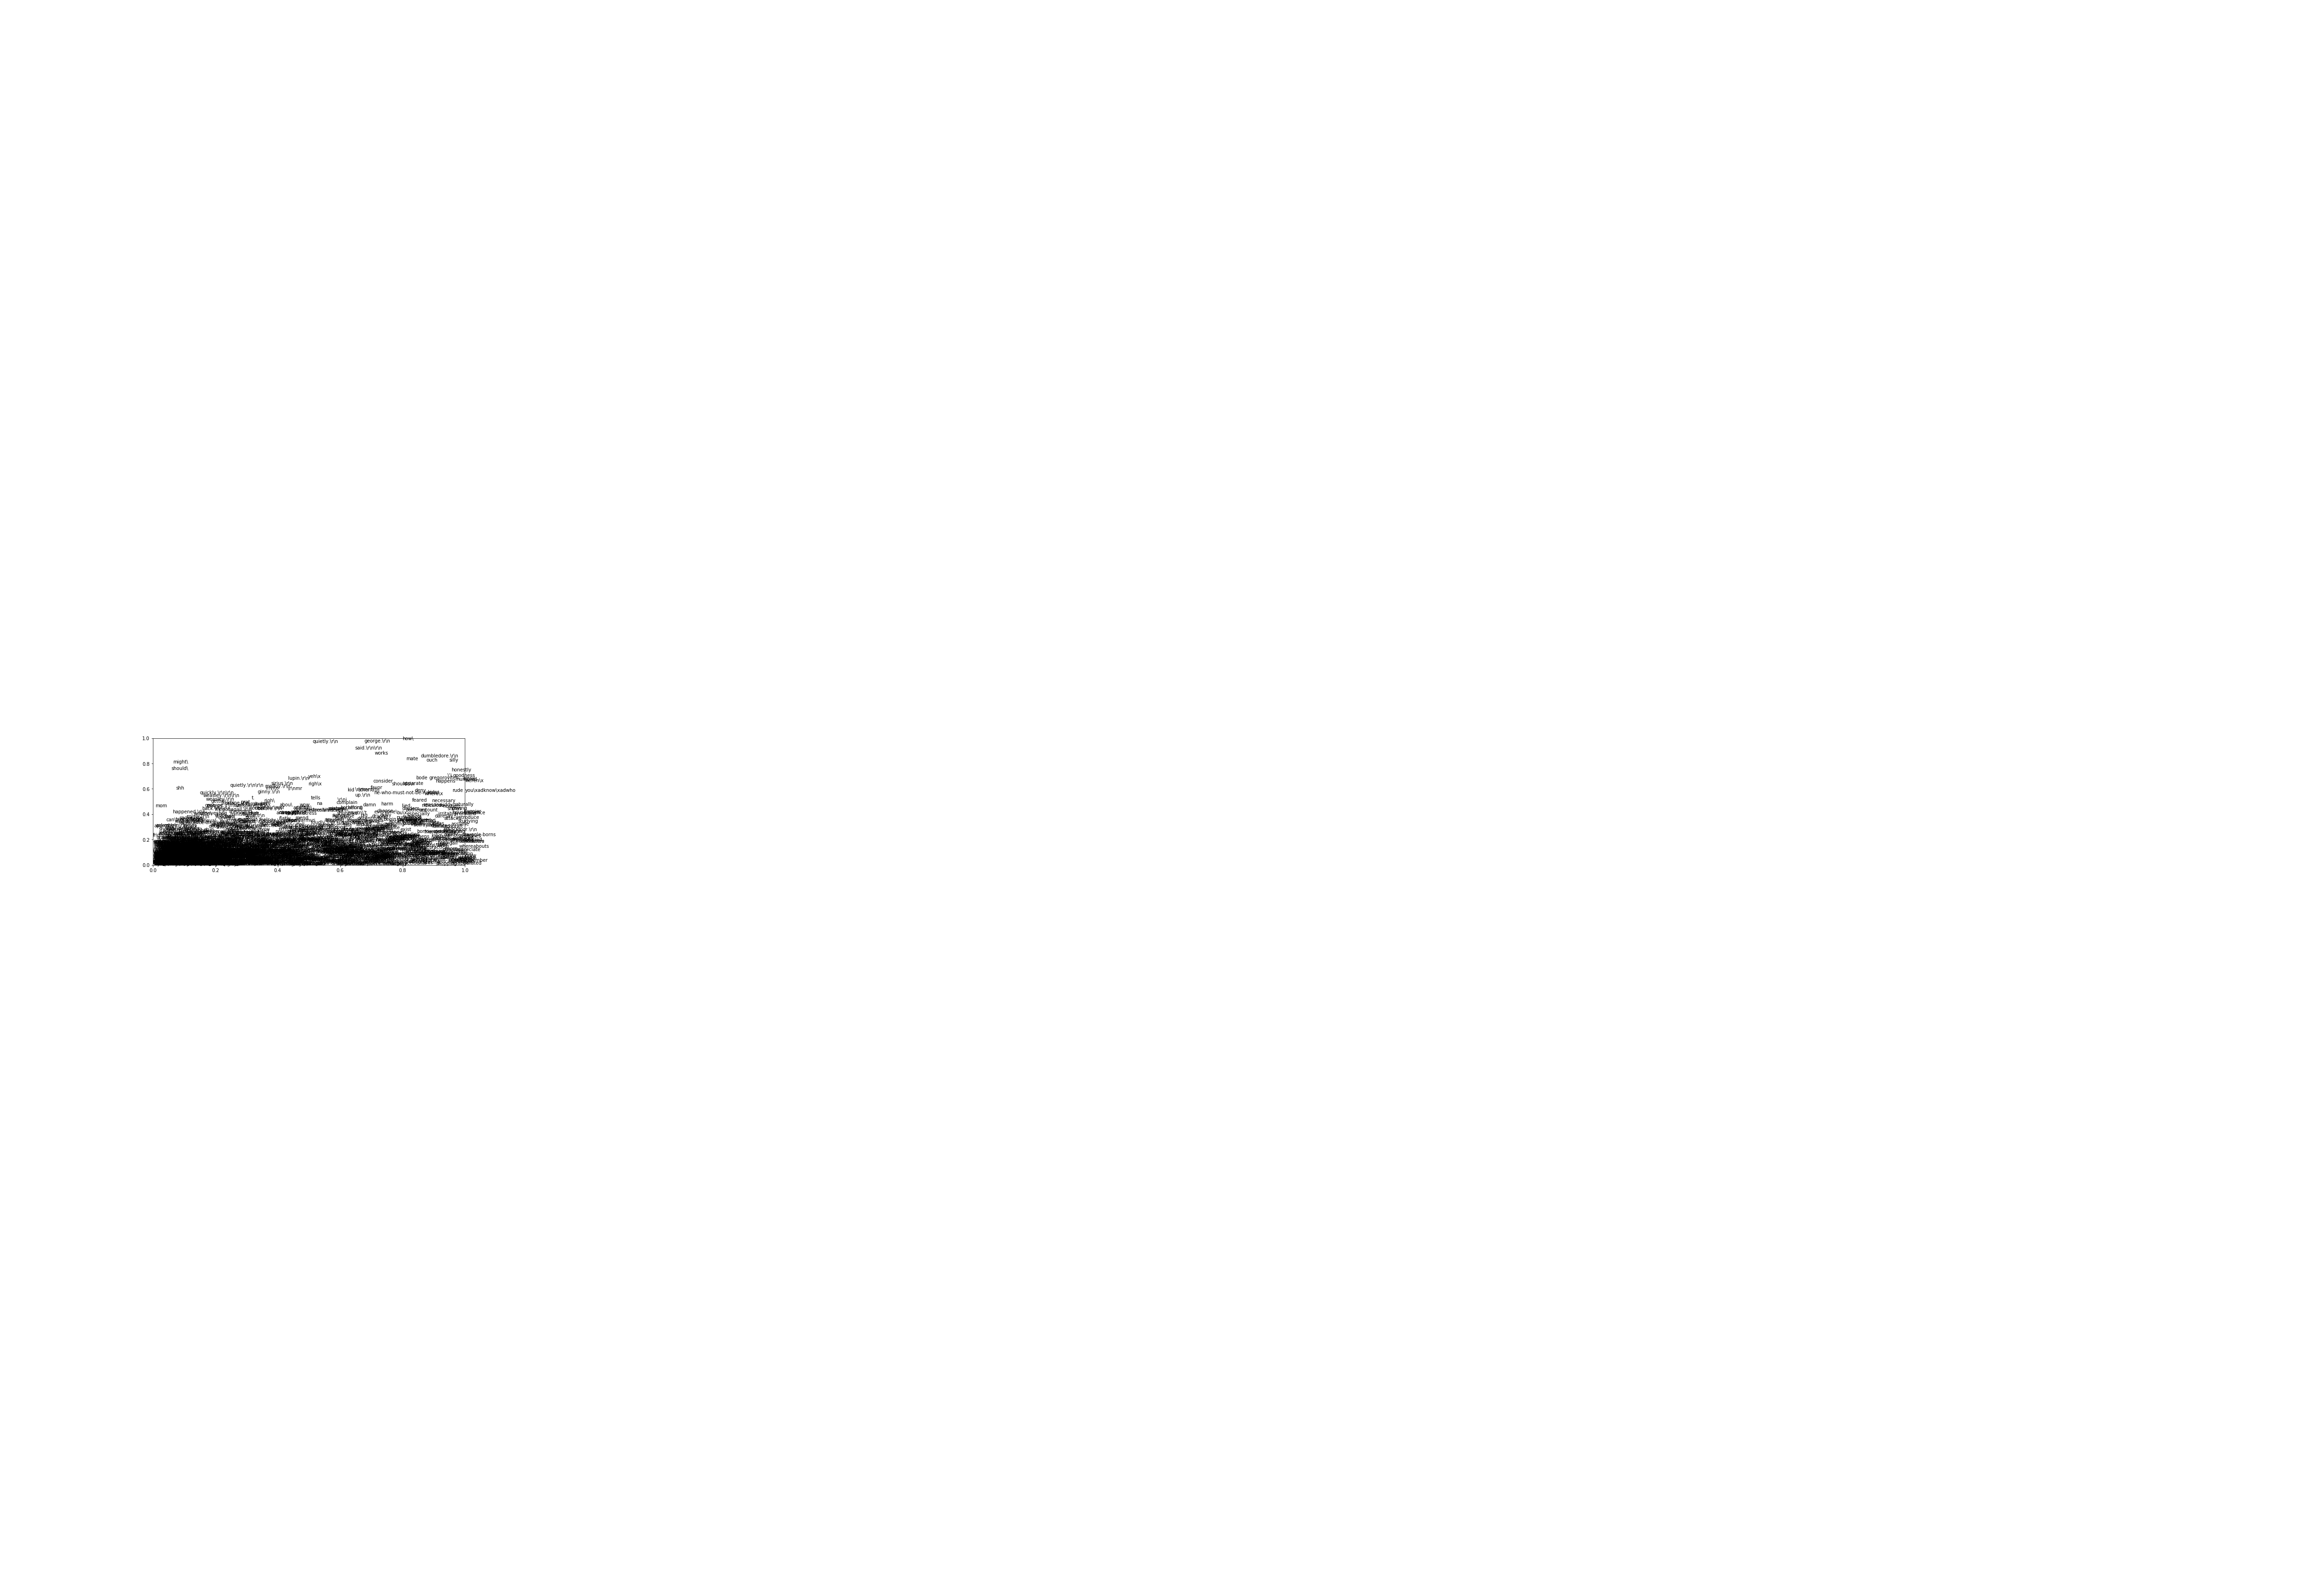

In [25]:
words = list(model.wv.vocab)
plt.figure(figsize=(12,5))
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()